# Exploratory Data Analysis and Cleaning of Car Dataset

In [ ]:
# setting logging to print only error messages from Sklearnex
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

sns.set_theme(palette="Set2")


In [ ]:
df = pd.read_csv("/content/Car_price_2024 (1).csv")
df.head()

,Model,Year,Fuel_Type,Transmission,DoorsNum,Condition,Color,Cruise,Leather_Seats,Heated_Seats,...,Price,Cylinder_Numbers,Credit_History,Engine_Size,Weight,carlength,carwidth,monthly_mileage,peakrpm,Estimated_Mileage
0,Nissan Altima,2007,Petrol,Manual,4.0,Fair,Brown,No,No,No,...,8005.469674,two,0.004967,1.655688,3170.460434,179.1,68.1,3020.474750,6000,36245.697
1,Toyota Corolla,2019,Electric,Manual,4.0,Excellent,Beige,Yes,No,Yes,...,25385.241860,two,-0.001383,2.696626,3543.00629,182.1,60.0,894.742606,4689,10736.91127
2,Honda CR-V,2004,Petrol,Manual,4.0,Fair,Brown,No,No,No,...,6553.601733,three,0.006477,1.642471,3125.542396,161.0,67.5,3496.160436,5190,41953.92523
3,Toyota Corolla,2020,Electric,Manual,4.0,Good,Brown,Yes,Yes,Yes,...,24381.083350,three,0.015230,2.044309,3340.060049,169.7,65.2,1037.247974,5720,12446.97569
4,Toyota Tundra,2017,Hybrid,Automatic,4.0,Good,Brown,Yes,No,No,...,28357.830640,five,-0.002342,2.586011,3847.825597,176.0,68.1,880.045753,4559,10560.54904


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              2230 non-null   object 
 1   Year               2230 non-null   int64  
 2   Fuel_Type          2227 non-null   object 
 3   Transmission       2223 non-null   object 
 4   DoorsNum           2223 non-null   float64
 5   Condition          2230 non-null   object 
 6   Color              2228 non-null   object 
 7   Cruise             2230 non-null   object 
 8   Leather_Seats      2230 non-null   object 
 9   Heated_Seats       2230 non-null   object 
 10  Navigation         2230 non-null   object 
 11  Owners             2230 non-null   int64  
 12  Insurance          2230 non-null   object 
 13  Service_History    2230 non-null   object 
 14  Safety             2230 non-null   object 
 15  Premium_Sound      2230 non-null   object 
 16  Multimedia         2230 

In [ ]:
df.shape

(2230, 32)

## Data Cleaning

In [ ]:
# Define corrections in columns Model, Fuel Type
corrections = {'Toyota Camary': 'Toyota Camry', 'Petroll': 'Petrol','AutoNamatic': 'Automatic', 'Excellent!' : 'Excellent',
               'Exc' : 'Excellent', 'Brwn' : 'Brown', 'Y' : 'Yes', 'Full ': 'Full Service', 'Partial ' : 'Partial Service',
              '4 years' : '4', 'two' : '2', 'three' : '3', 'four': '4', 'five' : '5', 'six' : '6' , 'Na': 'NaN', '50':'5', 'NA': 'NaN', '':'NaN', 'NaN': ''}


In [ ]:
df['Model'] = df['Model'].replace(corrections)
df['Model'].unique()

array(['Nissan Altima', 'Toyota Corolla', 'Honda CR-V', 'Toyota Tundra',
       'Ford Fusion', 'Ford Escape', 'Nissan GT-R', 'Chevrolet Volt',
       'Toyota Prius', 'Chevrolet Bolt', 'Chevrolet Impala',
       'Honda Pilot', 'Toyota Camry', 'Nissan Juke', 'Nissan Murano',
       'Chevrolet Corvette', 'Honda Accord', 'Chevrolet Camaro',
       'Nissan 350Z', 'Chevrolet Sonic', 'Ford Mustang', 'Honda Fit',
       'Nissan Titan'], dtype=object)

In [ ]:

df['Fuel_Type'] = df['Fuel_Type'].replace(corrections)
df['Fuel_Type'].unique()

array(['Petrol', 'Electric', 'Hybrid', nan], dtype=object)

In [ ]:
df['Transmission'] = df['Transmission'].replace(corrections)
df.replace('NaN', np.nan, inplace=True)
df['Transmission'].unique()

array(['Manual', 'Automatic', nan], dtype=object)

In [ ]:
df['Condition'] = df['Condition'].replace(corrections)
df['Condition'].unique()

array(['Fair', 'Excellent', 'Good'], dtype=object)

In [ ]:
df['Color'] = df['Color'].replace(corrections)
df['Color'].unique()

array(['Brown', 'Beige', 'Black', 'Yellow', 'Silver', 'White', nan],
      dtype=object)

In [ ]:
df['Cruise'] = df['Cruise'].replace(corrections)

df['Cruise'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Service_History'] = df['Service_History'].replace(corrections)
df['Service_History'].unique()

array(['No Service', 'Full Service', 'Partial Service'], dtype=object)

In [ ]:
corrections2 = {'4': '4 stars' }
df['Safety'] = df['Safety'].replace(corrections2)
df['Safety'].unique()

array(['Not rated/Unknown', '5 stars', '3 stars', '4 stars', '1 star',
       '2 stars'], dtype=object)

In [ ]:
df['TAge'] = df['TAge'].replace(corrections)
df['TAge'].unique()

array(['3', '1', '5', '2', '4'], dtype=object)

In [ ]:
df['Cylinder_Numbers'] = df['Cylinder_Numbers'].replace(corrections)
df['Cylinder_Numbers'].unique()

array(['2', '3', '5', '4', '6'], dtype=object)

In [ ]:
df['Cylinder_Numbers'] = df['Cylinder_Numbers'].astype(float)

In [ ]:
corrections3 = {'3rd Party' : 'Third Party', 'No' : 'No insurance' }
df['Insurance'] = df['Insurance'].replace(corrections3)
df['Insurance'].unique()

array(['Third Party', 'No insurance', 'Collision', 'Comprehensive'],
      dtype=object)

In [ ]:
df['Weight'] = df['Weight'].str.extract('(\d+)').astype(float)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              2230 non-null   object 
 1   Year               2230 non-null   int64  
 2   Fuel_Type          2227 non-null   object 
 3   Transmission       2221 non-null   object 
 4   DoorsNum           2223 non-null   float64
 5   Condition          2230 non-null   object 
 6   Color              2228 non-null   object 
 7   Cruise             2230 non-null   object 
 8   Leather_Seats      2230 non-null   object 
 9   Heated_Seats       2230 non-null   object 
 10  Navigation         2230 non-null   object 
 11  Owners             2230 non-null   int64  
 12  Insurance          2230 non-null   object 
 13  Service_History    2230 non-null   object 
 14  Safety             2230 non-null   object 
 15  Premium_Sound      2230 non-null   object 
 16  Multimedia         2230 

In [ ]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
rows_with_missing_values

,Model,Year,Fuel_Type,Transmission,DoorsNum,Condition,Color,Cruise,Leather_Seats,Heated_Seats,...,Price,Cylinder_Numbers,Credit_History,Engine_Size,Weight,carlength,carwidth,monthly_mileage,peakrpm,Estimated_Mileage
71,Toyota Prius,2010,NaN,Manual,2.0,Good,Black,No,No,No,...,27645.810830,6.0,0.015380,2.189206,3494.0,193.1,61.1,973.870477,6175,11686.44573
232,Nissan Altima,2000,NaN,Manual,4.0,Fair,Black,No,No,No,...,9848.389504,3.0,0.000456,1.848748,3655.0,168.5,66.9,2854.321407,6365,34251.85688
266,Nissan Altima,2004,Petrol,NaN,4.0,Fair,Black,No,No,No,...,8162.669564,3.0,0.016324,2.324003,3219.0,159.5,61.5,3447.134319,4814,41365.61183
279,Honda Pilot,2005,NaN,Manual,4.0,Fair,Yellow,No,No,No,...,5554.098164,3.0,-0.003853,1.967197,3211.0,175.9,62.1,3270.786628,5592,39249.43954
778,Honda Pilot,2008,Petrol,Manual,NaN,Good,Yellow,No,No,No,...,8076.593467,2.0,-0.000744,2.164980,3271.0,198.8,72.0,3122.301336,4302,37467.61603
779,Chevrolet Volt,2016,Petrol,Automatic,NaN,Good,Black,Yes,No,Yes,...,18249.357050,2.0,0.006207,1.781456,3919.0,169.8,60.1,1886.523369,5790,22638.28043
780,Ford Escape,2020,Hybrid,Manual,NaN,Good,Brown,No,No,Yes,...,21470.060500,6.0,0.001777,2.285190,3813.0,165.7,66.1,1155.509295,5670,13866.11154
781,Chevrolet Bolt,2018,Electric,Manual,NaN,Fair,Brown,Yes,No,Yes,...,14789.458510,4.0,-0.013353,2.036123,3342.0,180.6,61.5,2007.434258,4755,24089.2111
782,Chevrolet Impala,2006,Hybrid,Manual,NaN,Good,Beige,No,No,Yes,...,22063.379650,5.0,0.003802,2.780753,3354.0,187.9,67.2,1452.198721,5144,17426.38465
783,Honda Pilot,2004,Petrol,Manual,NaN,Fair,Yellow,No,No,No,...,5827.136034,2.0,0.006106,1.909165,3012.0,153.1,65.6,3450.038148,4395,41400.45778


In [ ]:
# Drop rows with null values in 'Transmission'
df_cleaned = df.dropna(subset=['Transmission'])

# Find mode of 'Transmission' grouped by 'Fuel_Type'
mode_transmission_by_fuel_type = df_cleaned.groupby('Fuel_Type')['Transmission'].agg(lambda x: x.mode().iloc[0])

mode_transmission_by_fuel_type

Fuel_Type
Electric    Manual
Hybrid      Manual
Petrol      Manual
Name: Transmission, dtype: object

In [ ]:
# Drop rows with null values in 'Fuel_Type'
df_cleaned = df.dropna(subset=['Fuel_Type'])

# Find mode of 'Transmission' grouped by 'Fuel_Type'
mode_Fuel_Type_by_Transmission = df_cleaned.groupby('Transmission')['Fuel_Type'].agg(lambda x: x.mode().iloc[0])
mode_Fuel_Type_by_Transmission

Transmission
Automatic    Hybrid
Manual       Petrol
Name: Fuel_Type, dtype: object

In [ ]:
# Calculate the mode of the 'Transmission' column
mode_value = df['Transmission'].mode()[0]

# Replace missing values with the mode
df['Transmission'].fillna(mode_value, inplace=True)


df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
# Boolean indexing to identify rows where 'Fuel_Type' is missing and 'Transmission' matches the conditions
automatic_condition = (df['Fuel_Type'].isnull()) & (df['Transmission'] == 'Automatic')
manual_condition = (df['Fuel_Type'].isnull()) & (df['Transmission'] == 'Manual')

# Replace missing values based on conditions
df.loc[automatic_condition, 'Fuel_Type'] = 'Hybrid'
df.loc[manual_condition, 'Fuel_Type'] = 'Petrol'

In [ ]:
# Calculate the mode of the 'Transmission' column
mode_value = df['Transmission'].mode()[0]

# Replace missing values with the mode
df['Transmission'].fillna(mode_value, inplace=True)

In [ ]:
df = df.drop(columns=['DoorsNum'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              2230 non-null   object 
 1   Year               2230 non-null   int64  
 2   Fuel_Type          2230 non-null   object 
 3   Transmission       2230 non-null   object 
 4   Condition          2230 non-null   object 
 5   Color              2228 non-null   object 
 6   Cruise             2230 non-null   object 
 7   Leather_Seats      2230 non-null   object 
 8   Heated_Seats       2230 non-null   object 
 9   Navigation         2230 non-null   object 
 10  Owners             2230 non-null   int64  
 11  Insurance          2230 non-null   object 
 12  Service_History    2230 non-null   object 
 13  Safety             2230 non-null   object 
 14  Premium_Sound      2230 non-null   object 
 15  Multimedia         2230 non-null   object 
 16  Bluetooth          2230 

In [ ]:
df[df.isnull().any(axis=1)]

,Model,Year,Fuel_Type,Transmission,Condition,Color,Cruise,Leather_Seats,Heated_Seats,Navigation,...,Price,Cylinder_Numbers,Credit_History,Engine_Size,Weight,carlength,carwidth,monthly_mileage,peakrpm,Estimated_Mileage
1004,Toyota Corolla,2021,Electric,Automatic,Good,Beige,Yes,No,No,Yes,...,25546.631510,3.0,0.006982,2.202021,NaN,193.8,61.3,1187.300216,6296,14247.60259
1066,Nissan Murano,2008,Petrol,Manual,Good,Brown,No,No,No,Yes,...,9795.938497,3.0,-0.012947,2.229904,NaN,192.2,64.8,2677.039490,6076,32124.47388
1130,Ford Escape,2005,Electric,Automatic,Good,Brown,Yes,No,Yes,Yes,...,21087.101340,5.0,0.003214,2.587682,NaN,146.5,66.5,817.780733,5711,9813.368795
1701,Nissan 350Z,2002,Petrol,Manual,Fair,NaN,No,No,No,No,...,7068.896537,2.0,0.004892,2.535221,2968.0,204.4,64.3,3269.893086,4461,39238.71703
1910,Honda Fit,2006,Petrol,Manual,Good,NaN,No,No,No,No,...,4331.533738,2.0,0.017325,1.881416,2883.0,160.4,66.4,3739.872791,5788,44878.47349


In [ ]:
# Remove 'km' from 'Estimate_Mileage' and convert to float
df['Estimated_Mileage'] = df['Estimated_Mileage'].str.extract('(\d+)').astype(float)


In [ ]:
# Calculate the mode of the 'Color' column
mode_value = df['Color'].mode()[0]

# Replace missing values with the mode
df['Color'].fillna(mode_value, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              2230 non-null   object 
 1   Year               2230 non-null   int64  
 2   Fuel_Type          2230 non-null   object 
 3   Transmission       2230 non-null   object 
 4   Condition          2230 non-null   object 
 5   Color              2230 non-null   object 
 6   Cruise             2230 non-null   object 
 7   Leather_Seats      2230 non-null   object 
 8   Heated_Seats       2230 non-null   object 
 9   Navigation         2230 non-null   object 
 10  Owners             2230 non-null   int64  
 11  Insurance          2230 non-null   object 
 12  Service_History    2230 non-null   object 
 13  Safety             2230 non-null   object 
 14  Premium_Sound      2230 non-null   object 
 15  Multimedia         2230 non-null   object 
 16  Bluetooth          2230 

## Feature Engineering

In [ ]:
# Assuming the current year is 2024
current_year = 2024

# Calculate the age of Car
df['Age'] = current_year - df['Year']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              2230 non-null   object 
 1   Year               2230 non-null   int64  
 2   Fuel_Type          2230 non-null   object 
 3   Transmission       2230 non-null   object 
 4   Condition          2230 non-null   object 
 5   Color              2230 non-null   object 
 6   Cruise             2230 non-null   object 
 7   Leather_Seats      2230 non-null   object 
 8   Heated_Seats       2230 non-null   object 
 9   Navigation         2230 non-null   object 
 10  Owners             2230 non-null   int64  
 11  Insurance          2230 non-null   object 
 12  Service_History    2230 non-null   object 
 13  Safety             2230 non-null   object 
 14  Premium_Sound      2230 non-null   object 
 15  Multimedia         2230 non-null   object 
 16  Bluetooth          2230 

In [ ]:
df = df.drop(columns=['Year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              2230 non-null   object 
 1   Fuel_Type          2230 non-null   object 
 2   Transmission       2230 non-null   object 
 3   Condition          2230 non-null   object 
 4   Color              2230 non-null   object 
 5   Cruise             2230 non-null   object 
 6   Leather_Seats      2230 non-null   object 
 7   Heated_Seats       2230 non-null   object 
 8   Navigation         2230 non-null   object 
 9   Owners             2230 non-null   int64  
 10  Insurance          2230 non-null   object 
 11  Service_History    2230 non-null   object 
 12  Safety             2230 non-null   object 
 13  Premium_Sound      2230 non-null   object 
 14  Multimedia         2230 non-null   object 
 15  Bluetooth          2230 non-null   object 
 16  Wheel              2230 

In [ ]:
# Find correlation of 'Price' with all other variables
Price_correlation = df.corr()['Price']

print(Price_correlation)

Owners              -0.205366
Warranty             0.042927
Price                1.000000
Cylinder_Numbers     0.528854
Credit_History       0.013477
Engine_Size          0.038724
Weight               0.465769
carlength            0.018720
carwidth            -0.018300
monthly_mileage     -0.952326
peakrpm             -0.014461
Estimated_Mileage   -0.952061
Age                 -0.623140
Name: Price, dtype: float64


<ipython-input-33-63794047de26>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Price_correlation = df.corr()['Price']


In [ ]:
df.describe()

,Owners,Warranty,Price,Cylinder_Numbers,Credit_History,Engine_Size,Weight,carlength,carwidth,monthly_mileage,peakrpm,Estimated_Mileage,Age
count,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2227.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000
mean,5.117489,19.735874,17241.511048,3.453363,0.000360,2.931071,3489.340817,175.439552,66.477309,1986.593741,5343.346637,23842.141704,14.297758
std,9.643330,8.419290,8961.471367,1.368204,0.009869,9.195792,310.243423,19.677468,3.770973,994.408364,722.580399,11925.884546,5.676737
min,0.000000,6.000000,3527.516896,2.000000,-0.032413,1.000000,2500.000000,141.000000,60.000000,-326.426931,4100.000000,1126.000000,2.000000
25%,2.000000,13.000000,8897.953205,2.000000,-0.006230,2.020221,3281.000000,158.500000,63.100000,1116.573719,4721.250000,13398.000000,10.000000
50%,2.000000,19.000000,17393.385485,3.000000,0.000253,2.284103,3490.000000,175.600000,66.500000,1758.514301,5324.500000,21102.000000,15.000000
75%,3.000000,27.000000,24067.296380,5.000000,0.006728,2.553892,3695.500000,192.575000,69.800000,2940.711792,5969.000000,35288.250000,19.000000
max,44.000000,35.000000,51219.220660,6.000000,0.038527,152.348978,4500.000000,209.000000,73.000000,4167.599834,6600.000000,50011.000000,24.000000


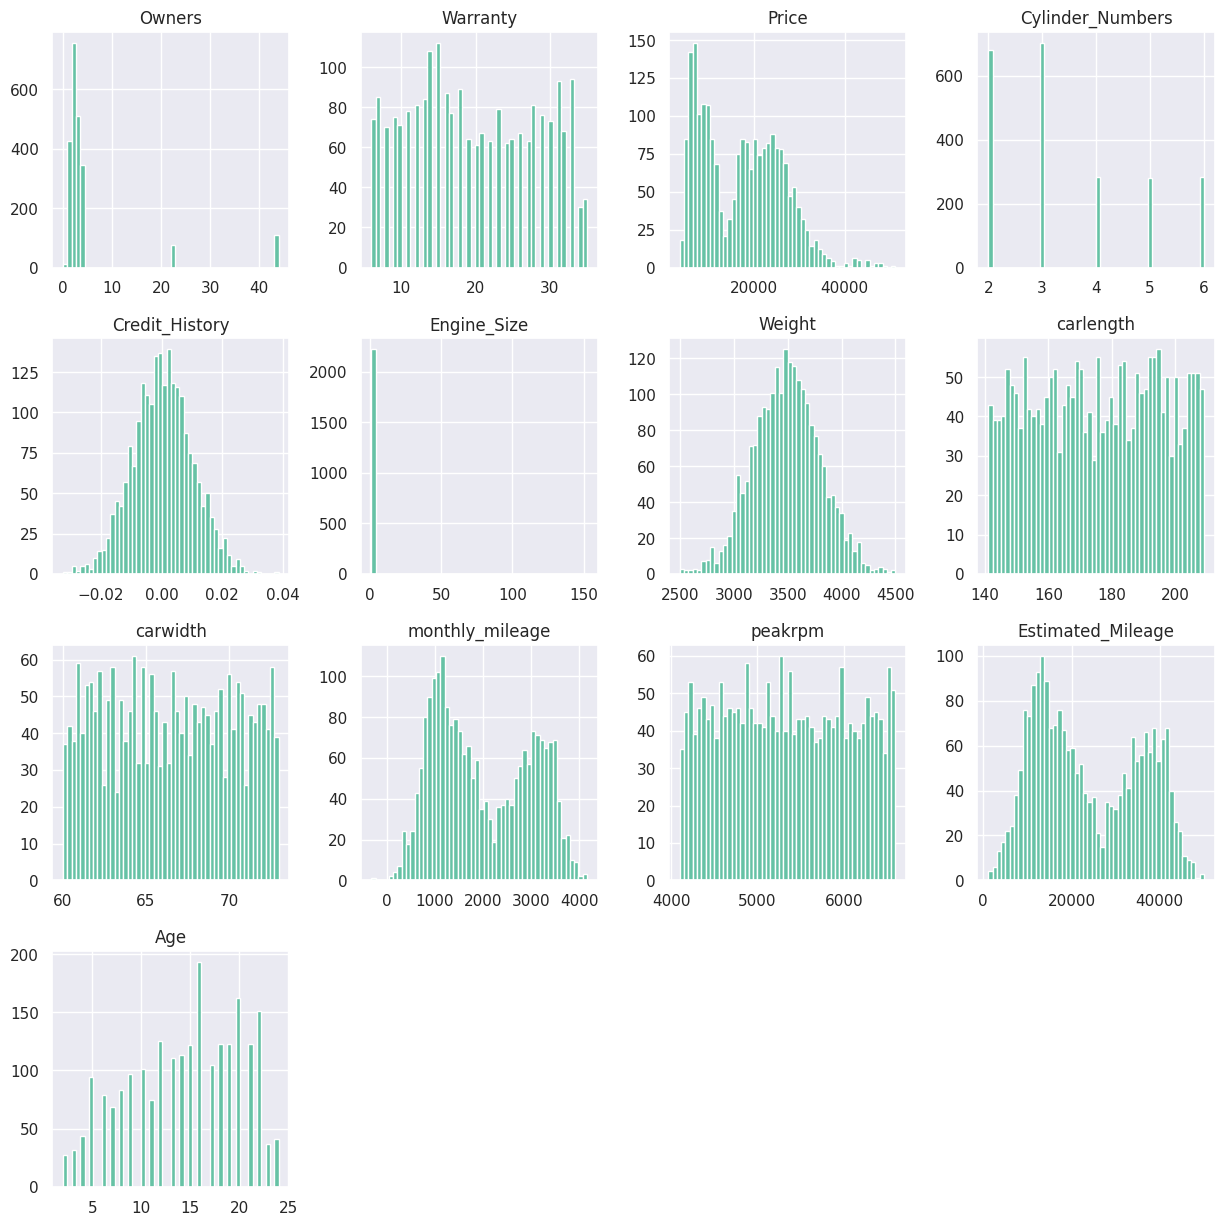

In [ ]:
_ = df.hist(bins=50, figsize=(15, 15))


# Correlation Matrix

In [ ]:
corr_matrix = df.corr(method="pearson", numeric_only=True)
corr_matrix.style.background_gradient(cmap='coolwarm', axis=None).format(precision=3)

,Owners,Warranty,Price,Cylinder_Numbers,Credit_History,Engine_Size,Weight,carlength,carwidth,monthly_mileage,peakrpm,Estimated_Mileage,Age
Owners,1.000,0.003,-0.205,-0.082,-0.000,-0.025,-0.094,-0.011,0.049,0.192,0.028,0.192,0.112
Warranty,0.003,1.000,0.043,0.014,-0.004,0.022,0.020,0.000,-0.003,-0.042,-0.006,-0.043,-0.042
Price,-0.205,0.043,1.000,0.529,0.013,0.039,0.466,0.019,-0.018,-0.952,-0.014,-0.952,-0.623
Cylinder_Numbers,-0.082,0.014,0.529,1.000,0.003,-0.009,0.233,0.016,-0.026,-0.525,-0.018,-0.525,-0.351
Credit_History,-0.000,-0.004,0.013,0.003,1.000,-0.004,0.012,-0.012,-0.022,-0.019,0.018,-0.018,0.006
Engine_Size,-0.025,0.022,0.039,-0.009,-0.004,1.000,0.013,0.007,-0.006,-0.040,0.004,-0.040,-0.012
Weight,-0.094,0.020,0.466,0.233,0.012,0.013,1.000,0.032,-0.008,-0.447,-0.017,-0.447,-0.315
carlength,-0.011,0.000,0.019,0.016,-0.012,0.007,0.032,1.000,0.034,-0.014,0.004,-0.014,-0.032
carwidth,0.049,-0.003,-0.018,-0.026,-0.022,-0.006,-0.008,0.034,1.000,0.032,-0.001,0.032,0.023
monthly_mileage,0.192,-0.042,-0.952,-0.525,-0.019,-0.040,-0.447,-0.014,0.032,1.000,0.015,1.000,0.648


### Selecting Top 10 Variables

In [ ]:
# select only the variables that are most likely to be correlated
df1 = df.loc[: , ['Fuel_Type','monthly_mileage', 'Weight','Age', 'Cylinder_Numbers', 'Transmission', 'Condition', 'Navigation', 'Service_History', 'Sunroof', 'Price']]
df1

,Fuel_Type,monthly_mileage,Weight,Age,Cylinder_Numbers,Transmission,Condition,Navigation,Service_History,Sunroof,Price
0,Petrol,3020.474750,3170.0,17,2.0,Manual,Fair,No,No Service,No,8005.469674
1,Electric,894.742606,3543.0,5,2.0,Manual,Excellent,Yes,Full Service,No,25385.241860
2,Petrol,3496.160436,3125.0,20,3.0,Manual,Fair,No,No Service,No,6553.601733
3,Electric,1037.247974,3340.0,4,3.0,Manual,Good,Yes,Full Service,Yes,24381.083350
4,Hybrid,880.045753,3847.0,7,5.0,Automatic,Good,Yes,Partial Service,No,28357.830640
...,...,...,...,...,...,...,...,...,...,...,...
2225,Electric,2051.008598,4157.0,11,2.0,Automatic,Good,Yes,Full Service,No,15164.228470
2226,Petrol,2965.163102,3058.0,17,2.0,Manual,Good,No,Partial Service,No,6250.307375
2227,Hybrid,1300.819060,3503.0,12,4.0,Automatic,Excellent,Yes,Full Service,No,21614.535620
2228,Petrol,3053.176775,3748.0,21,3.0,Manual,Good,Yes,No Service,No,8373.305539


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fuel_Type         2230 non-null   object 
 1   monthly_mileage   2230 non-null   float64
 2   Weight            2227 non-null   float64
 3   Age               2230 non-null   int64  
 4   Cylinder_Numbers  2230 non-null   float64
 5   Transmission      2230 non-null   object 
 6   Condition         2230 non-null   object 
 7   Navigation        2230 non-null   object 
 8   Service_History   2230 non-null   object 
 9   Sunroof           2230 non-null   object 
 10  Price             2230 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 191.8+ KB


### Insert Dummy Variables

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(drop="first", sparse=False)

In [ ]:
# categorical columns to transform
cat_cols = ["Fuel_Type", "Transmission", "Condition", "Navigation", "Service_History", "Sunroof" ]

# fit an encoder and transform the **df1**
cat_vals = df1[cat_cols]
cat_vals

,Fuel_Type,Transmission,Condition,Navigation,Service_History,Sunroof
0,Petrol,Manual,Fair,No,No Service,No
1,Electric,Manual,Excellent,Yes,Full Service,No
2,Petrol,Manual,Fair,No,No Service,No
3,Electric,Manual,Good,Yes,Full Service,Yes
4,Hybrid,Automatic,Good,Yes,Partial Service,No
...,...,...,...,...,...,...
2225,Electric,Automatic,Good,Yes,Full Service,No
2226,Petrol,Manual,Good,No,Partial Service,No
2227,Hybrid,Automatic,Excellent,Yes,Full Service,No
2228,Petrol,Manual,Good,Yes,No Service,No


In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(drop="first", sparse=False)

transformed = one_hot_encoder.fit_transform(cat_vals)
transformed

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.]])

In [ ]:
# Create the DataFrame directly from the transformed array
transformed_df = pd.DataFrame(transformed, columns=one_hot_encoder.get_feature_names_out(input_features=cat_cols))

In [ ]:
df1_numeric = df1.drop( df1[cat_cols], axis=1)
# Concatenate with the numeric DataFrame
df_final = pd.concat([df1_numeric, transformed_df], axis=1)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   monthly_mileage                  2230 non-null   float64
 1   Weight                           2227 non-null   float64
 2   Age                              2230 non-null   int64  
 3   Cylinder_Numbers                 2230 non-null   float64
 4   Price                            2230 non-null   float64
 5   Fuel_Type_Hybrid                 2230 non-null   float64
 6   Fuel_Type_Petrol                 2230 non-null   float64
 7   Transmission_Manual              2230 non-null   float64
 8   Condition_Fair                   2230 non-null   float64
 9   Condition_Good                   2230 non-null   float64
 10  Navigation_Yes                   2230 non-null   float64
 11  Service_History_No Service       2230 non-null   float64
 12  Service_History_Part

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=20)

df_final = pd.DataFrame(imputer.fit_transform(df_final),
                                     columns=df_final.columns,
                                     index= df_final.index)

In [ ]:
df_final.isnull().sum()

monthly_mileage                    0
Weight                             0
Age                                0
Cylinder_Numbers                   0
Price                              0
Fuel_Type_Hybrid                   0
Fuel_Type_Petrol                   0
Transmission_Manual                0
Condition_Fair                     0
Condition_Good                     0
Navigation_Yes                     0
Service_History_No Service         0
Service_History_Partial Service    0
Sunroof_Yes                        0
dtype: int64

In [ ]:
df_final.to_csv('DM1.csv', index=False)

## Exploratory Data Analysis

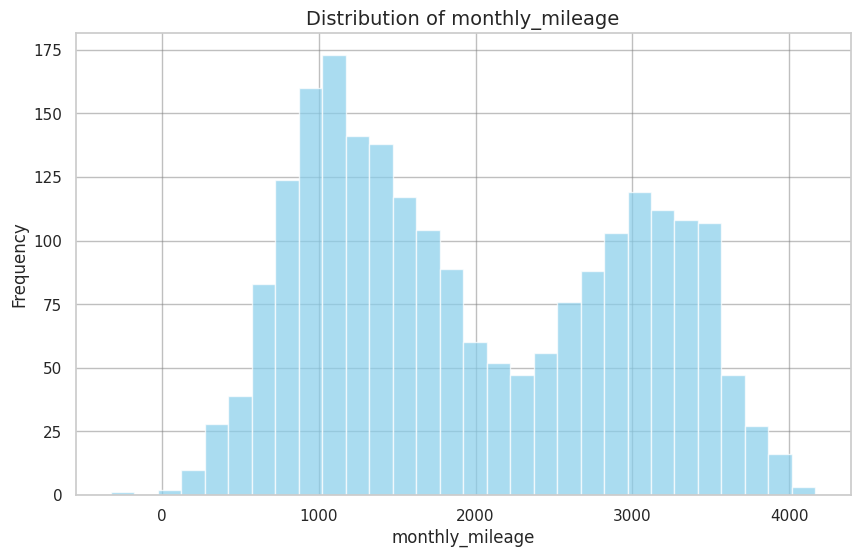

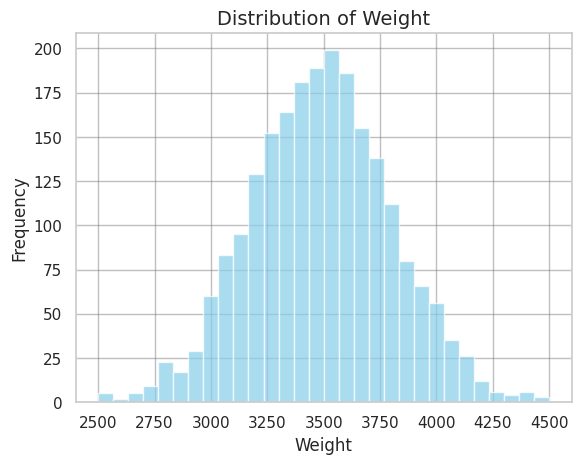

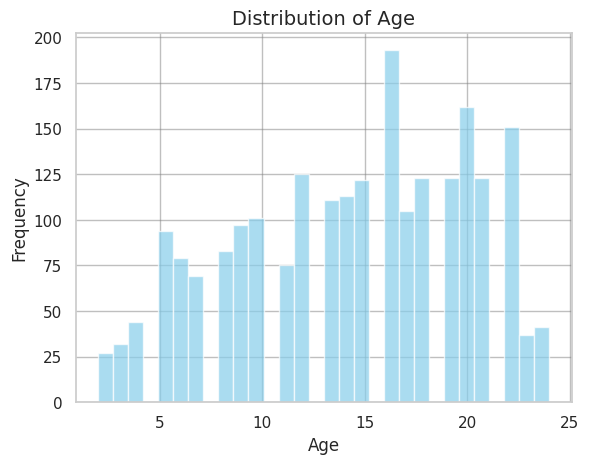

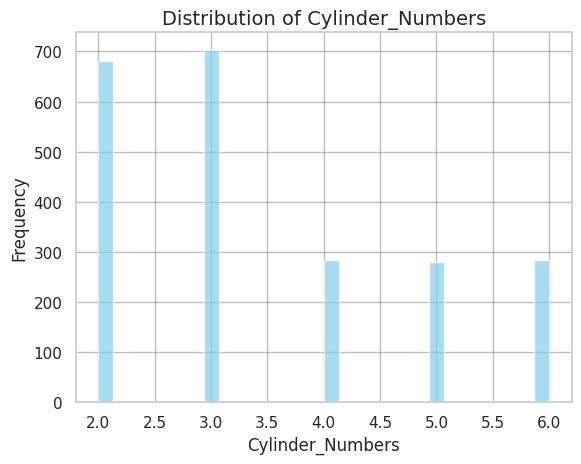

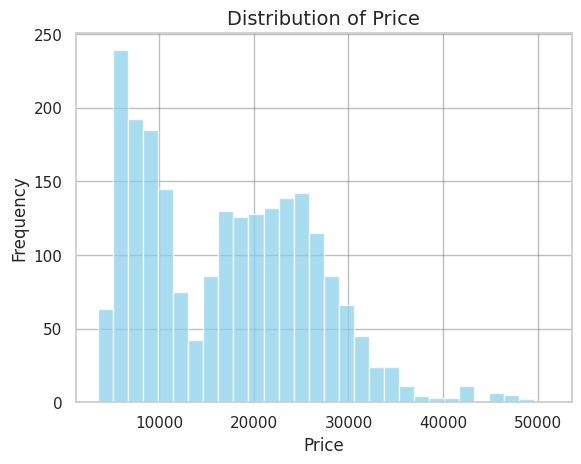

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Loop over each column in df1
for var in df1.columns:
    # Check if the variable is numerical
    if df1[var].dtype in ['int64', 'float64']:
        # Create histogram for the variable with specified bins and color
        plt.hist(df1[var], bins=30, color='skyblue', alpha=0.7)

        # Set labels and title
        plt.xlabel(var, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.title(f'Distribution of {var}', fontsize=14)

        # Show grid with white color
        plt.grid(True, linestyle='-', alpha=0.5, color='grey')

        # Add gridlines
        plt.grid(True)

        # Show the plot
        plt.show()



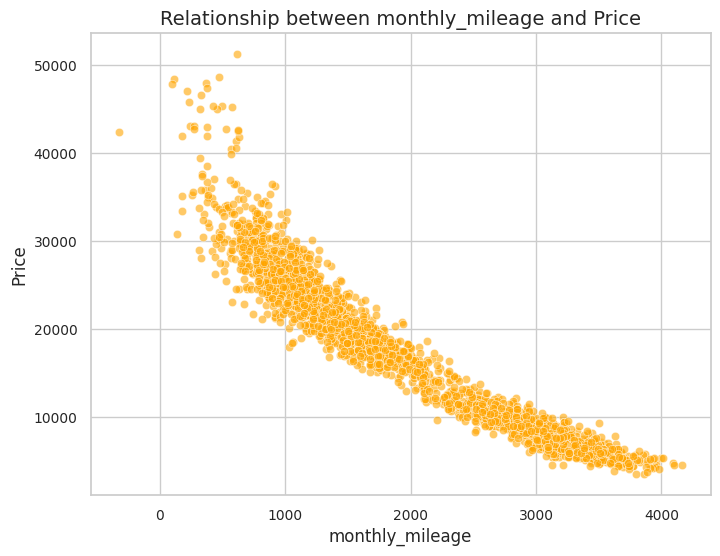

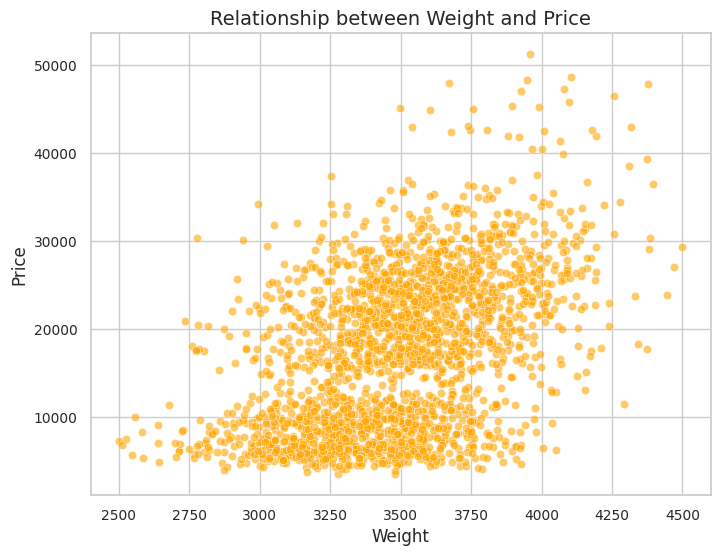

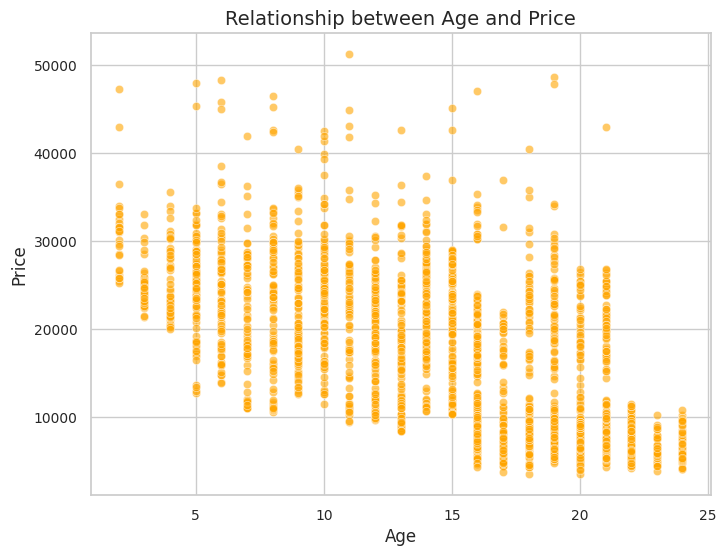

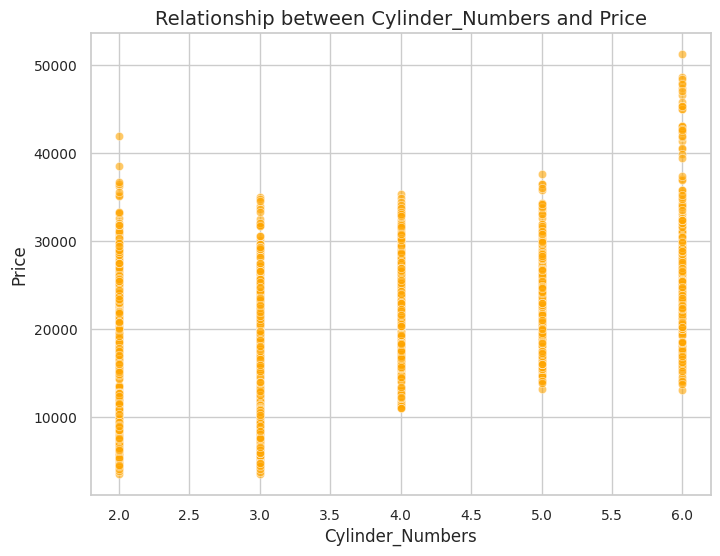

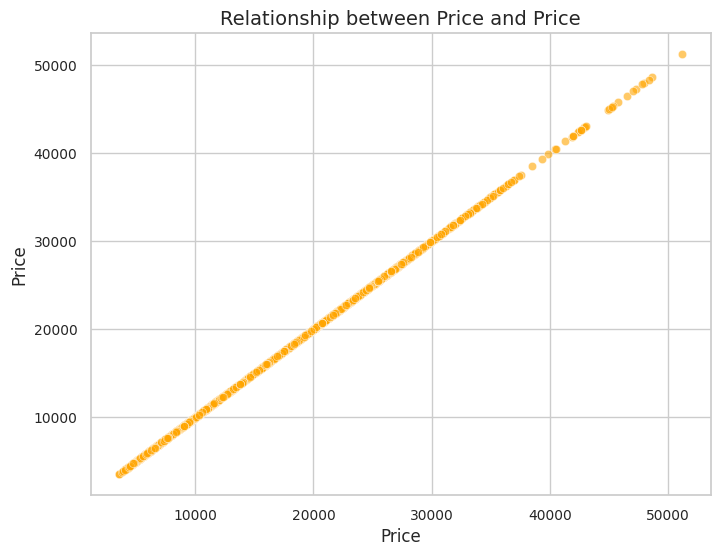

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Assuming df1 is your DataFrame containing the variables
numerical_columns = df1.select_dtypes(include='number').columns

# Create scatter plots for each variable against Price
for var in numerical_columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size for better visibility
    sns.scatterplot(x=var, y='Price', data=df1, color='orange', alpha=0.6)  # Adjust transparency for better clarity
    plt.title(f'Relationship between {var} and Price', fontsize=14)  # Increase title font size
    plt.xlabel(var, fontsize=12)  # Increase x-axis label font size
    plt.ylabel('Price', fontsize=12)  # Increase y-axis label font size
    plt.xticks(fontsize=10)  # Increase tick label font size for x-axis
    plt.yticks(fontsize=10)  # Increase tick label font size for y-axis
    plt.grid(True)  # Add grid lines for better readability
    plt.show()




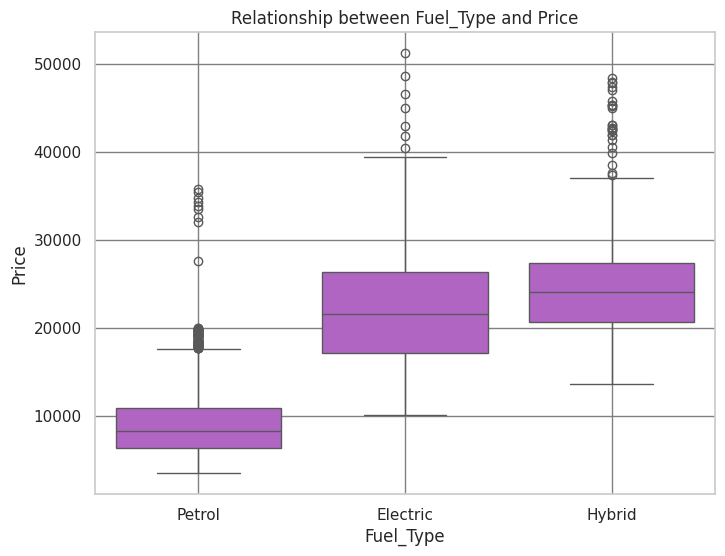

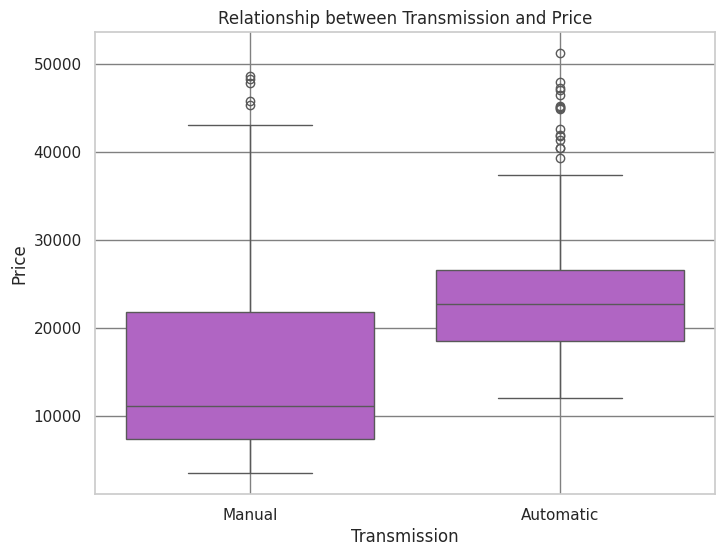

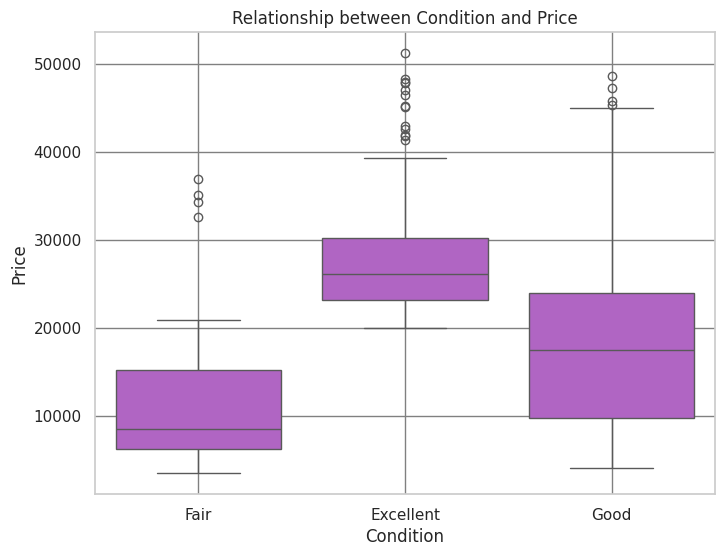

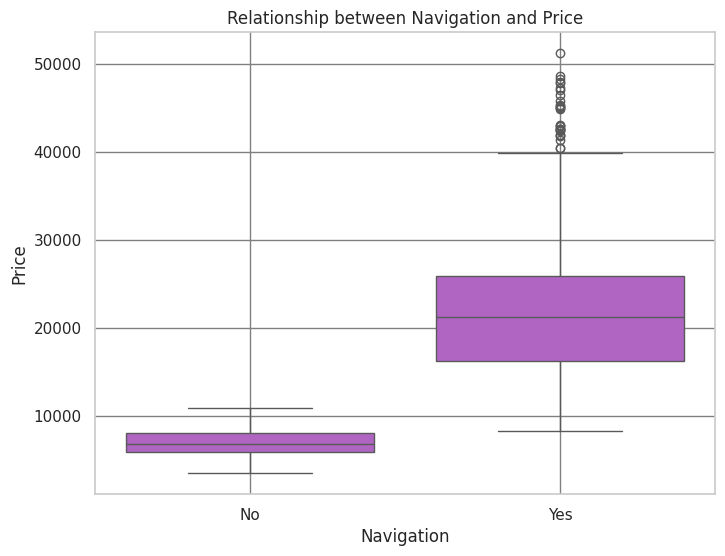

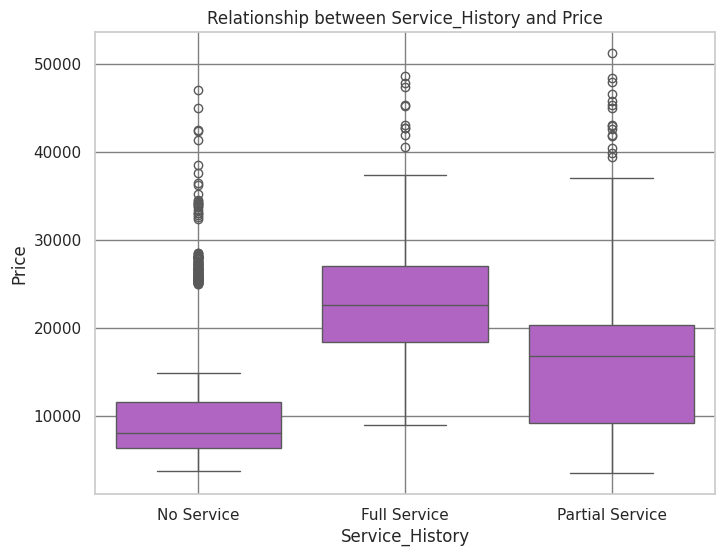

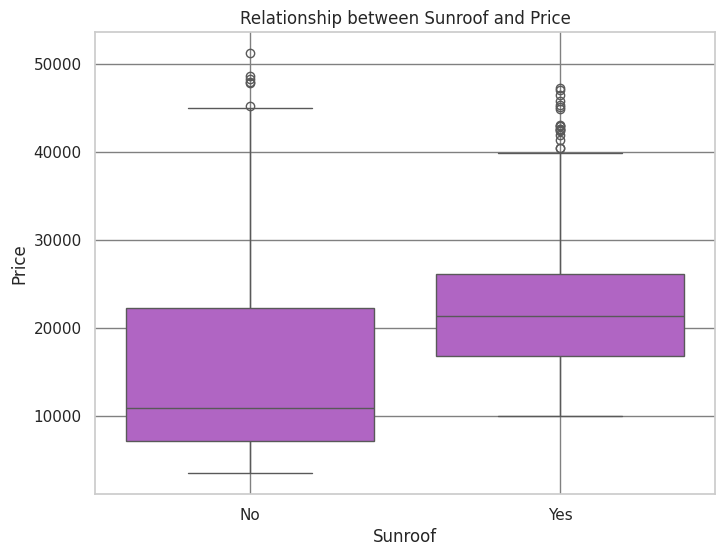

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify categorical columns
categorical_columns = df1.select_dtypes(include=['category', 'object']).columns

# Plot seaborn's boxplots for each categorical column separately
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='Price', data=df1, color='mediumorchid')
    plt.title(f'Relationship between {col} and Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.xticks(rotation=0)  # Rotate x-axis labels to 0 degrees
    plt.grid(color='grey', linestyle='-')  # Set grid color and style
    plt.show()




In [ ]:
from scipy.stats import f_oneway

# Assuming df is your DataFrame containing the variables

# Perform ANOVA for each categorical variable
for col in categorical_columns:
    # Group price by the categories of the categorical variable
    groups = [df[df[col] == category]['Price'] for category in df[col].unique()]

    # Perform ANOVA
    stat, p_value = f_oneway(*groups)

    # Print the results
    print(f'ANOVA for {col}:')
    print(f'Statistic: {stat}, p-value: {p_value}')
    if p_value < 0.05:
        print('There is a significant difference in price between the categories.')
    else:
        print('There is no significant difference in price between the categories.')
    print()


ANOVA for Fuel_Type:
Statistic: 1819.3561225952792, p-value: 0.0
There is a significant difference in price between the categories.

ANOVA for Transmission:
Statistic: 499.32487143358117, p-value: 5.786116137794541e-100
There is a significant difference in price between the categories.

ANOVA for Condition:
Statistic: 578.3955363205274, p-value: 4.961574793639394e-203
There is a significant difference in price between the categories.

ANOVA for Navigation:
Statistic: 2301.4115718705257, p-value: 0.0
There is a significant difference in price between the categories.

ANOVA for Service_History:
Statistic: 338.6950563420462, p-value: 3.7564295661264266e-129
There is a significant difference in price between the categories.

ANOVA for Sunroof:
Statistic: 337.118204456633, p-value: 3.156544310241059e-70
There is a significant difference in price between the categories.



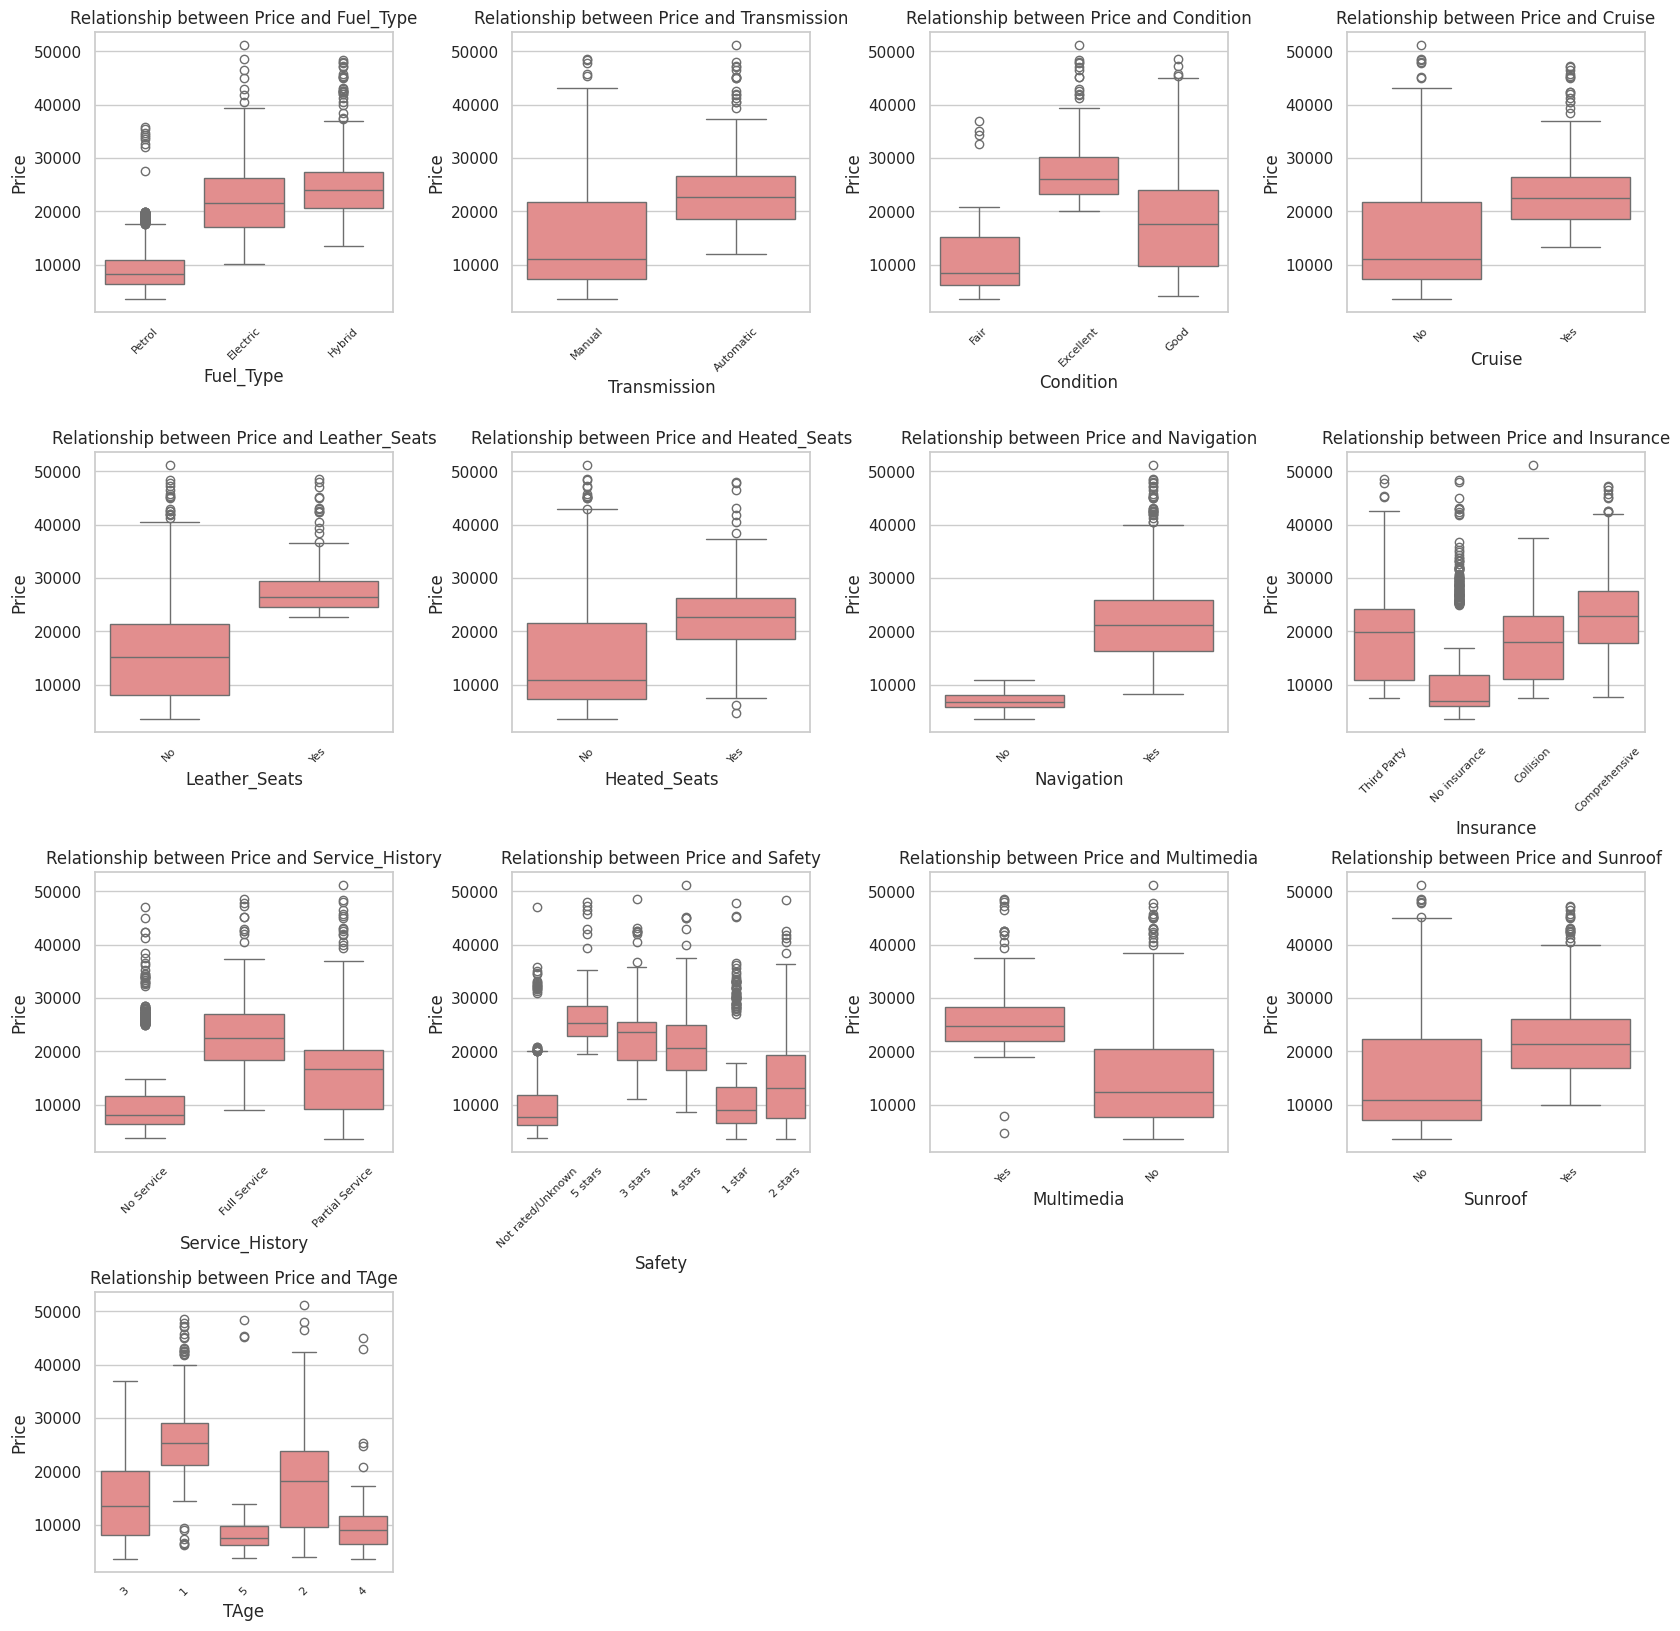

In [ ]:
# List of categorical variables
categorical_variables = ['Fuel_Type', 'Transmission', 'Condition', 'Cruise', 'Leather_Seats', 'Heated_Seats',
                         'Navigation', 'Insurance', 'Service_History', 'Safety', 'Multimedia', 'Sunroof', 'TAge']

# Create subplots for box plots
num_plots = len(categorical_variables)
num_cols = 4  # Number of columns in subplot grid
num_rows = -(-num_plots // num_cols)  # Ceiling division for number of rows

# Set up the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
fig.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust vertical and horizontal spacing between subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create box plots for each categorical variable
for i, var in enumerate(categorical_variables):
    sns.boxplot(x=var, y='Price', data=df, ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Relationship between Price and {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Price')
    axes[i].tick_params(axis='x', labelrotation=45, labelsize=8)  # Reduce font size and rotate x-axis labels

# Hide empty subplots
for j in range(i + 1, num_cols * num_rows):
    fig.delaxes(axes[j])

plt.show()

